In [ ]:
!pip install pymysql

In [ ]:
import pymysql

In [4]:
# sql 서버 정보를 입력
_db = pymysql.connect(
    user = 'root', 
    password = 'java', 
    host = 'localhost', 
    db = 'os', 
    port = 3306
)

In [5]:
# cursor 생성
cursor = _db.cursor()

cursor2 = _db.cursor(pymysql.cursors.DictCursor)

In [7]:
sql = """
    SELECT 
    * 
    FROM 
    offline
"""

In [8]:
cursor.execute(sql)
cursor2.execute(sql)

1213

In [9]:
result = cursor.fetchall()
result2 = cursor2.fetchall()

In [ ]:
result

In [ ]:
result2

In [12]:
import pandas as pd

In [14]:
pd.DataFrame(result2)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600
1,201901,백화점,1,10,379,19458720
2,201901,백화점,1,80,11198,1186133303
3,201901,백화점,1,90,468,29194852
4,201901,백화점,2,0,2,128200
...,...,...,...,...,...,...
1208,202109,편의점,2,10,2115,14879960
1209,202109,편의점,2,60,243768,1997441975
1210,202109,편의점,2,70,40523,352420260
1211,202109,편의점,2,80,6349,53334882


### 문제 
1. 데이터베이스에 있는 offline 테이블을 로드하여 데이터프레임으로 변환
2. 데이터프레임의 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월 컬럼의 데이터의 타입을 시계열 데이터로 변경
4. 데이터베이스에 있는 online 테이블을 로드하여 데이터프레임으로 변환
5. 온라인 데이터프레임에 컬럼의 이름을 ['기준년월', '성별', '연령대', '총이용건수', '총이용금액'] 변경
6. 파생변수('업종') 생성하여 데이터는 '온라인' 대입
7. 온라인 데이터프레임의 기준년월 데이터 타입을 시계열로 변경
7. 두개의 데이터프레임을 단순 행 결합 
8. 기준년월, 업종 별로 그룹화 하여 총 이용금액의 합계를 출력하고 라인 그래프로 시각화

In [1]:
# mysql과 연동시키는 라이브러리 로드 
import pymysql

In [3]:
# sql server와 연결
_db = pymysql.connect(
    host = 'localhost', 
    user = 'root', 
    password = 'java', 
    db = 'os',
    port = 3306
)

In [5]:
cursor = _db.cursor(pymysql.cursors.DictCursor)

In [6]:
# select 쿼리문 작성
sql = """
    SELECT 
    * 
    FROM 
    offline
"""

cursor.execute(sql)

# select의 결과를 data1 변수에 대입
data1 = cursor.fetchall()

print(data1)

[{'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 1, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 7600}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 379, 'tco_btc_u_am': 19458720}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 11198, 'tco_btc_u_am': 1186133303}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 90, 'tco_btc_u_ct': 468, 'tco_btc_u_am': 29194852}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 0, 'tco_btc_u_ct': 2, 'tco_btc_u_am': 128200}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 1, 'tco_btc_u_ct': 9, 'tco_btc_u_am': 269780}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 10, 'tco_btc_u_ct': 1168, 'tco_btc_u_am': 65231910}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 80, 'tco_btc_u_ct': 17043, 'tco_btc_u_am': 1922992702}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, '

In [7]:
import pandas as pd

In [8]:
offline = pd.DataFrame(data1)

offline.head(1)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600


In [ ]:
# 컬럼의 이름을 변경

offline.rename( 
    columns= {
        'crym' : '기준년월', 
        'tco_btc_nm' : '업종', 
        'ma_fem_dc' : '성별', 
        'agegrp_dc' : '연령대', 
        'tco_btc_u_ct' : '총이용건수', 
        'tco_btc_u_am' : '총이용금액'
    } 
)


In [12]:
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [13]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600


In [15]:
# 데이터의 타입 변경 -> 시계열데이터로 변경
# to_datetime(스리즈형태의 데이터, format = {변경시킬 데이터의 형태})
# pandas 내부에 있는 함수
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [16]:
# online table에 데이터를 로드 
sql = """
    SELECT 
    * 
    FROM 
    online
"""

cursor.execute(sql)

data2 = cursor.fetchall()
print(data2)

[{'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 1, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 110685}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 2333, 'tco_btc_u_am': 98108225}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 5632, 'tco_btc_u_am': 607601993}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 90, 'tco_btc_u_ct': 196, 'tco_btc_u_am': 21542552}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 0, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 1000}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 10, 'tco_btc_u_ct': 3671, 'tco_btc_u_am': 153291754}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 80, 'tco_btc_u_ct': 8817, 'tco_btc_u_am': 842508577}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 90, 'tco_btc_u_ct': 147, 'tco_btc_u_am': 12058915}, {'crym': 201902, 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 1950, 'tco_btc_u_am': 85255299}, {'crym': 201902, 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 4874, 'tco_btc_u_am': 542666730}, {'crym': 201902, 'ma_

In [17]:
online = pd.DataFrame(data2)
online.head(1)

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685


In [18]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
online.head(1)

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685


In [19]:
# 파생변수 (업종) 생성 -> 데이터는 '온라인' 대입
online['업종'] = '온라인'
online.head(3)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,80,5632,607601993,온라인


In [21]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format='%Y%m')

In [23]:
# concat([데이터프레임1, 데이터프레임2, ...], axis= { 0('rows') | 1('columns') }, ignore_index = bool )
# pandas 내부 함수
df = pd.concat([offline, online], axis=0, ignore_index=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    1468 non-null   datetime64[ns]
 1   업종      1468 non-null   object        
 2   성별      1468 non-null   int64         
 3   연령대     1468 non-null   int64         
 4   총이용건수   1468 non-null   int64         
 5   총이용금액   1468 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 68.9+ KB


In [28]:
# df.groupby(['기준년월', '업종']).sum()[['총이용금액']]
group_data = df[ ['기준년월', '업종', '총이용금액'] ].groupby(['기준년월', '업종']).sum()

In [47]:
# pivot_table() 그룹화
# pandas 내부 함수
pivot_data = pd.pivot_table(
    df, 
    index = '기준년월', 
    columns= '업종',
    values= '총이용금액', 
    aggfunc= 'mean'
)

In [48]:
pivot_data

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,3.616572e+08,4.387345e+08,2.169030e+08,2.025054e+08,1.146697e+08
2019-02-01,3.539437e+08,4.769001e+08,2.520155e+08,3.544560e+08,5.771863e+08
2019-03-01,4.095942e+08,5.280755e+08,2.180090e+08,1.981423e+08,3.163798e+08
2019-04-01,3.966829e+08,4.835962e+08,2.859346e+08,2.350435e+08,1.571412e+08
2019-05-01,1.459471e+08,2.962882e+08,2.926007e+08,2.599749e+08,1.192752e+08
2019-06-01,4.031329e+08,3.396372e+08,2.787681e+08,2.409274e+08,3.619899e+08
2019-07-01,3.446722e+08,3.397153e+08,2.441645e+08,3.226358e+08,1.226666e+08
2019-08-01,3.446914e+08,1.284537e+08,2.193007e+08,2.599444e+08,1.216156e+08
2019-09-01,3.581397e+08,1.169731e+08,2.217959e+08,2.993172e+08,1.203805e+08


In [32]:
import matplotlib.pyplot as plt

In [34]:
import platform

In [35]:
if platform.system() == 'Darwin':   # MAC인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='기준년월,업종'>

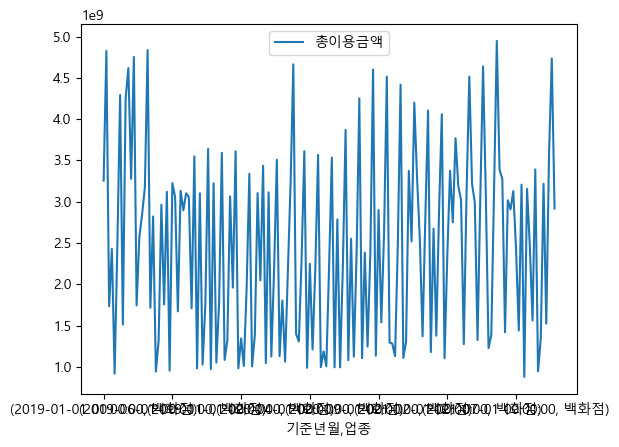

In [36]:
group_data.plot()

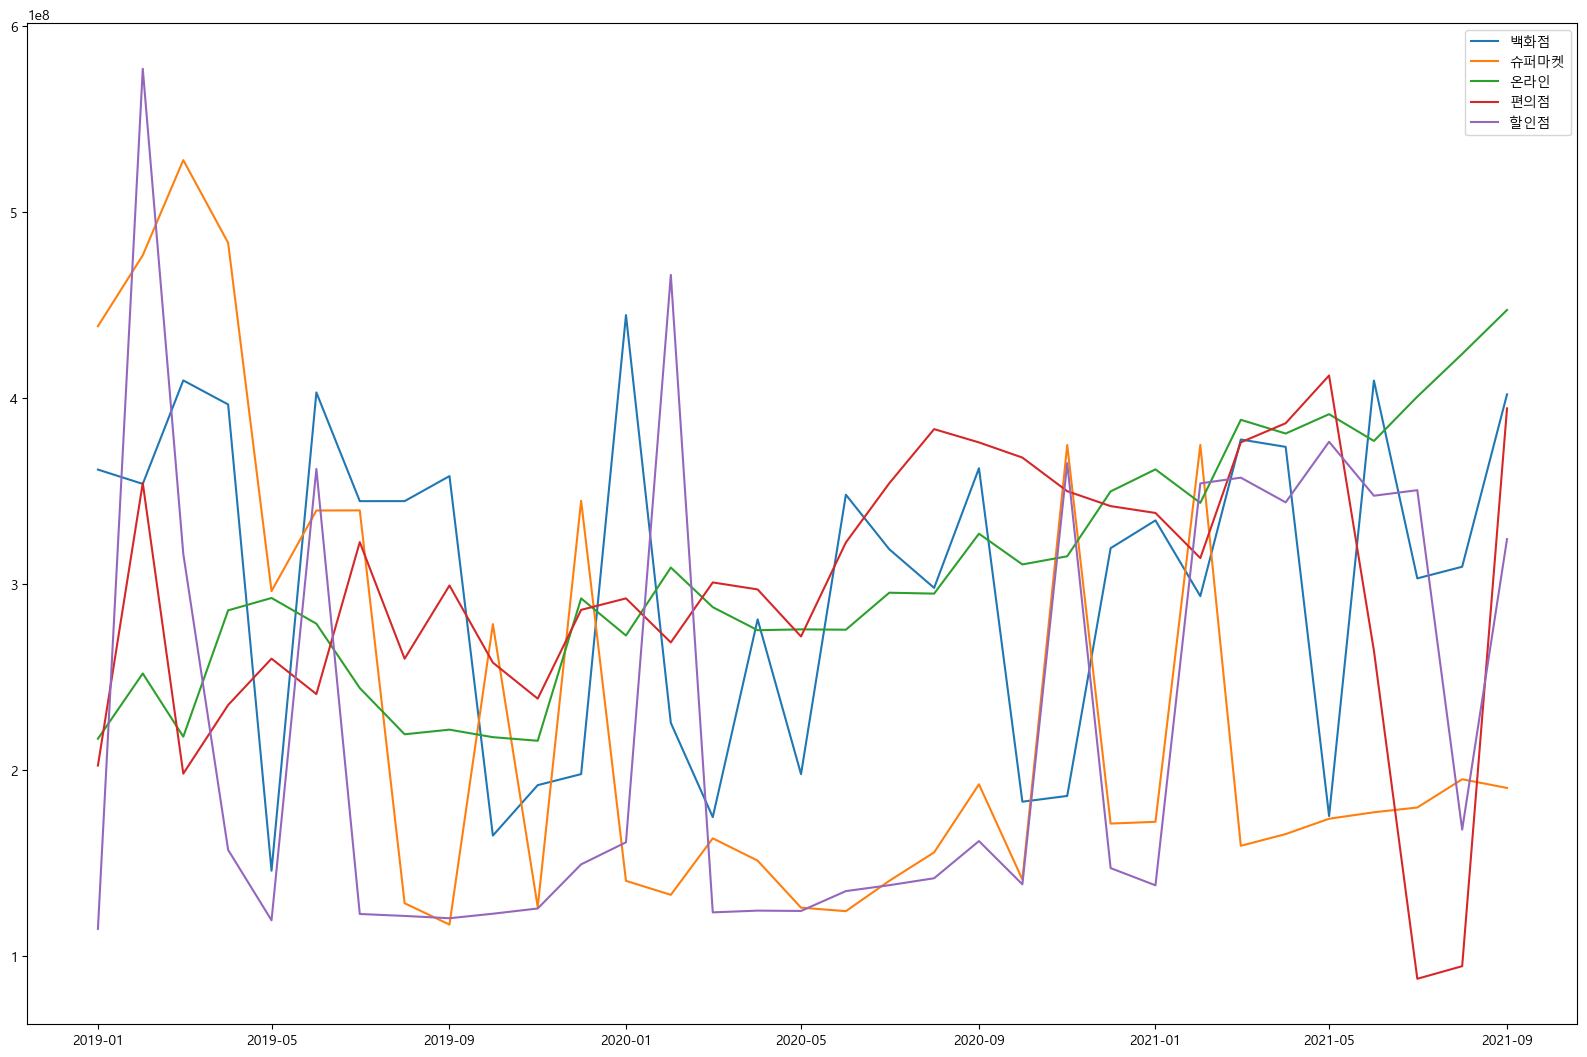

In [49]:
plt.figure(figsize=(20, 13))

for col in pivot_data.columns:
    plt.plot(pivot_data[col], label=col)

plt.legend()

plt.show()



In [51]:
pd.read_csv('./test_csv/오프라인.csv', encoding='cp949').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.2+ KB


In [58]:
group_data = group_data.unstack()

In [59]:
group_data.head(1)

총이용금액                                               
업종                 백화점        슈퍼마켓         온라인         편의점        할인점
기준년월                                                                 
2019-01-01  3254914638  4826079794  1735223701  2430064480  917357326

In [60]:
pivot_data.head(1)

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,361657182.0,4.387345e+08,2.169030e+08,2.025054e+08,1.146697e+08


In [ ]:
group_data['총이용금액']

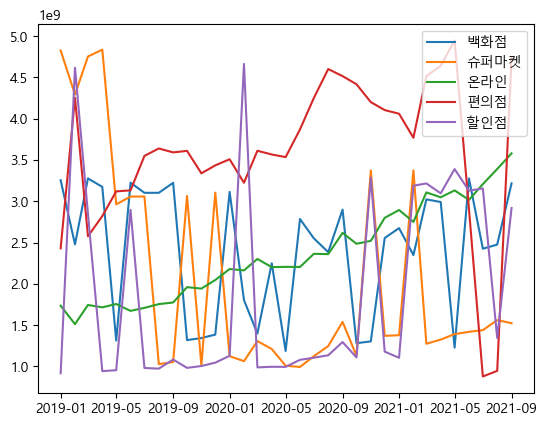

In [63]:
for col in group_data['총이용금액'].columns:
    plt.plot(group_data['총이용금액'][col], label = col)
plt.legend()
plt.show()

In [ ]:
group_data2 = df[ ['기준년월', '업종', '총이용금액' ] ].groupby(['기준년월', '업종']).sum()
group_data2.head(5)

In [69]:
'백화점' in group_data2.index[0]

True

In [ ]:
# is함수 : 특정한 데이터가 존재하는가? bool의 형태로 출력해주는 함수
# isna() : 결측치가 존재하는지 체크하는 함수
# isin([{data}]) : 배열 데이터 안에 값들이 포함되어있는지 체크하는 함수

In [71]:
df2 = group_data2.reset_index()

In [ ]:
df2.loc[ df2['업종'] == '백화점' ]

In [74]:
df2.head(2)

,기준년월,업종,총이용금액
0,2019-01-01,백화점,3254914638
1,2019-01-01,슈퍼마켓,4826079794


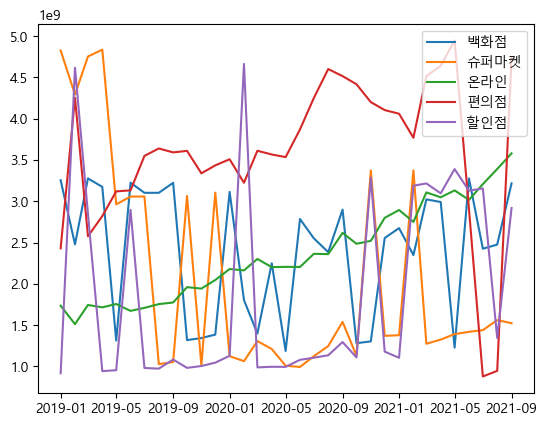

In [75]:
for i in df2['업종'].unique():
    x = df2.loc[df2['업종'] == i, '기준년월']
    y = df2.loc[df2['업종'] == i, '총이용금액']
    plt.plot(x, y, label = i)
plt.legend()
plt.show()

In [ ]:
flag = df2['업종'].isin(['슈퍼마켓', '편의점'])
df2.loc[flag]

In [79]:
flag2 = (df2['업종'] == '슈퍼마켓') | (df2['업종'] == '편의점')
df2.loc[flag2]

,기준년월,업종,총이용금액
1,2019-01-01,슈퍼마켓,4826079794
3,2019-01-01,편의점,2430064480
6,2019-02-01,슈퍼마켓,4292100514
8,2019-02-01,편의점,4253471629
11,2019-03-01,슈퍼마켓,4752679293
...,...,...,...
153,2021-07-01,편의점,878230455
156,2021-08-01,슈퍼마켓,1560982018
158,2021-08-01,편의점,946034198
161,2021-09-01,슈퍼마켓,1523527130
